## Bounding box to fit a persion

In [7]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import selectivesearch
import copy
import numpy as np

In [24]:
def extract_iou(candidate, current_y,img_shape):
    '''
    INPUTS:
    candidate: 
    '''
    boxA = copy.deepcopy(candidate)
    boxB = copy.deepcopy(current_y)
    
    img1 = np.zeros(img_shape)
    img1[boxA[1]:boxA[3],boxA[0]:boxA[2]]=1
    
    img2 = np.zeros(img_shape)
    img2[int(boxB[1]):int(boxB[3]),int(boxB[0]):int(boxB[2])]=1
    
    iou = np.sum(img1*img2)/(np.sum(img1)+np.sum(img2)- np.sum(img1*img2))
    return iou

In [9]:
#Input image
img = cv2.imread('Tata_20170207_350_630.jpg')

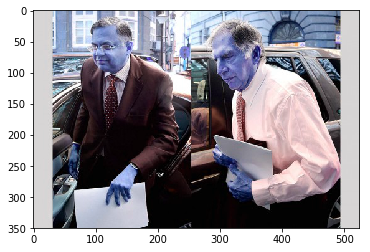

In [13]:
#plot the image and verify the actual location of the object of interest
plt.imshow(img)
plt.grid(False)

Note that the region of interest is 50 pixels from botton left extending to 200. Additionally, on the y-axis it starts from 25 pixel too the end of the image.
Therefore, the actual bounding box of the object is (50,25,200,350), which is in the format _xmin, ymin, xmax, ymax_.

### Step 4: Extract the region proposals:

In [102]:
img_lbl, regions = selectivesearch.selective_search(img, scale=100, min_size=2000)

In [103]:
img_lbl

array([[[215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        ...,
        [215., 213., 213.,   7.],
        [215., 213., 213.,   7.],
        [215., 213., 213.,   7.]],

       [[215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        ...,
        [215., 213., 213.,   7.],
        [215., 213., 213.,   7.],
        [215., 213., 213.,   7.]],

       [[215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        ...,
        [214., 212., 212.,   7.],
        [214., 212., 212.,   7.],
        [214., 212., 212.,   7.]],

       ...,

       [[215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        ...,
        [215., 213., 213.,  18.],
        [215., 213., 213.,  18.],
        [215., 213., 213.,  18.]],

       [[215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        [215., 213., 213.,   0.],
        .

In [108]:
len(regions)

39

In [121]:
print(len(regions))
candidates = set()
#candidates = []

for r in regions:
    if r['rect'] in candidates:
        continue 
    # excluding regions smaller than 2000 pixels     
    if r['size'] < 20000:
        continue     
    x, y, w, h = r['rect'] 
    candidates.add(r['rect'])
#candidates.append(r['rect'])

39


In [122]:
candidates

{(0, 0, 185, 349),
 (0, 0, 280, 349),
 (0, 0, 493, 349),
 (0, 0, 524, 349),
 (31, 72, 249, 277),
 (126, 0, 367, 331),
 (173, 0, 351, 349),
 (173, 227, 320, 122),
 (236, 19, 257, 231),
 (236, 19, 257, 312)}

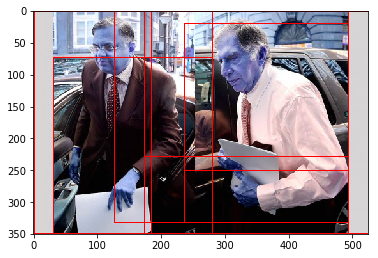

In [123]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
for x, y, w, h in candidates:    
    rect = mpatches.Rectangle(        
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)    
    ax.add_patch(rect)
#plt.axis('off')
plt.show()

In [129]:
regions =list(candidates)
actual_bb = [50,25,200,350]
iou = []
for i in range(len(regions)):     
    candidate = list(regions[i])
    candidate[2] += candidate[0]
    iou.append(extract_iou(candidate, actual_bb, img.shape))

In [130]:
np.argmax(iou)

4

In [131]:
max_region = list(regions[np.argmax(iou)])
max_region[2] -= max_region[0]
max_region[3] -= max_region[1]
actual_bb[2] -= actual_bb[0]
actual_bb[3] -= actual_bb[1]

In [132]:
maxcandidate_actual = [max_region,actual_bb]

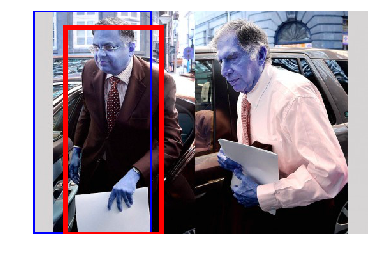

In [133]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
for i,(x, y, w, h) in enumerate(maxcandidate_actual): 
    if(i==0): 
        rect = mpatches.Rectangle( (x, y), w, h, fill=False, edgecolor='blue', linewidth=2) 
        ax.add_patch(rect) 
    else: 
        rect = mpatches.Rectangle( (x, y), w, h, fill=False, edgecolor='red', linewidth=5) 
        ax.add_patch(rect)
plt.axis('off')
plt.show()